In [1]:
import quantiacsToolbox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [4]:
class myStrategy(object):

    def myTradingSystem(self, DATE, OPEN, HIGH, LOW, CLOSE, VOL, OI, P, R, RINFO, exposure, equity, settings):
        """ This system uses linear regression to allocate capital into the desired equities"""

        # Get parameters from setting
        nMarkets = len(settings['markets'])
        lookback = settings['lookback']
        dimension = settings['dimension']
        threshold = settings['threshold']

        pos = np.zeros(nMarkets, dtype=np.float)

        poly = PolynomialFeatures(degree=dimension)
        for market in range(nMarkets):
            reg = linear_model.LinearRegression()
            try:
                #predicting volume
                reg.fit(poly.fit_transform(np.arange(lookback).reshape(-1,1)), VOL[:,market])
                vol_predict = reg.predict(poly.fit_transform(np.array([[lookback]])))
                #predicting open price
                reg.fit(poly.fit_transform(np.arange(lookback).reshape(-1,1)), OPEN[:,market])
                open_predict = reg.predict(poly.fit_transform(np.array([[lookback]])))
                #predicting close price
                X = np.append(VOL[:,market], OPEN[:,market], axis=1)
                reg.fit(X,CLOSE[:,market])
                x = np.append(vol_predict,open_predict,axis=1)
                close_predict = reg.predict(x)
                
                trend = (close_predict - CLOSE[-1, market]) / CLOSE[-1, market]

                if abs(trend[0]) < threshold:
                    trend[0] = 0

                pos[market] = np.sign(trend)

            # for NaN data set position to 0
            except ValueError:
                pos[market] = .0

        return pos, settings


    def mySettings(self):
        """ Define your trading system settings here """

        settings = {}

        Futures Contracts
        settings['markets'] = ['CASH', 'F_AD', 'F_BO', 'F_BP', 'F_C', 'F_CC', 'F_CD',
                               'F_CL', 'F_CT', 'F_DX', 'F_EC', 'F_ED', 'F_ES', 'F_FC', 'F_FV', 'F_GC',
                               'F_HG', 'F_HO', 'F_JY', 'F_KC', 'F_LB', 'F_LC', 'F_LN', 'F_MD', 'F_MP',
                               'F_NG', 'F_NQ', 'F_NR', 'F_O', 'F_OJ', 'F_PA', 'F_PL', 'F_RB', 'F_RU',
                               'F_S', 'F_SB', 'F_SF', 'F_SI', 'F_SM', 'F_TU', 'F_TY', 'F_US', 'F_W', 'F_XX',
                               'F_YM']
        #settings['markets'] = ['CASH', 'F_S', 'F_AD']
        settings['lookback'] = 252
        settings['budget'] = 10 ** 6
        settings['slippage'] = 0.05

        settings['threshold'] = 0.05
        settings['dimension'] = 3

        return settings

Loading Data...
Done!
Evaluating Trading System <class '__main__.myStrategy'>


E:\Anaconda\lib\site-packages\quantiacsToolbox\quantiacsToolbox.py:881: RuntimeWarning: invalid value encountered in true_divide
  position = position / np.sum(abs(position))
E:\Anaconda\lib\site-packages\quantiacsToolbox\quantiacsToolbox.py:1288: RuntimeWarning: invalid value encountered in double_scalars
  sharpeRatio = returnYearly / volaYearly
E:\Anaconda\lib\site-packages\quantiacsToolbox\quantiacsToolbox.py:1295: RuntimeWarning: invalid value encountered in double_scalars
  sortino = returnYearly / downsideVolaYearly
E:\Anaconda\lib\site-packages\quantiacsToolbox\quantiacsToolbox.py:1324: RuntimeWarning: invalid value encountered in double_scalars
  mar = returnYearly / maxDD
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


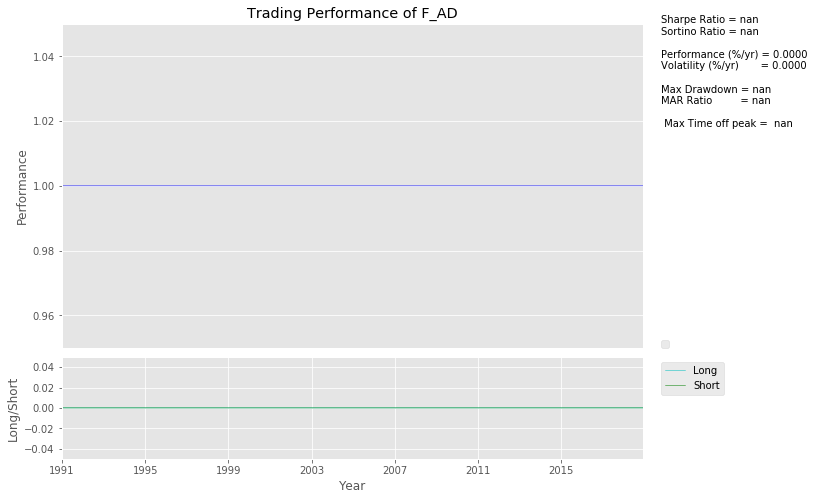

In [5]:
result = quantiacsToolbox.runts(myStrategy)